In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [56]:
# Step 1: Data Preprocessing
# Load the training data
data = pd.read_csv("risk-train.txt",sep='\t') 
data.sample(10)
data.columns

Index(['ORDER_ID', 'CLASS', 'B_EMAIL', 'B_TELEFON', 'B_BIRTHDATE',
       'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART',
       'Z_CARD_VALID', 'Z_LAST_NAME', 'VALUE_ORDER', 'WEEKDAY_ORDER',
       'TIME_ORDER', 'AMOUNT_ORDER', 'ANUMMER_01', 'ANUMMER_02', 'ANUMMER_03',
       'ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08',
       'ANUMMER_09', 'ANUMMER_10', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO',
       'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT',
       'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH',
       'SESSION_TIME', 'NEUKUNDE', 'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE',
       'DATE_LORDER', 'MAHN_AKT', 'MAHN_HOECHST'],
      dtype='object')

In [57]:
print(data.columns)


Index(['ORDER_ID', 'CLASS', 'B_EMAIL', 'B_TELEFON', 'B_BIRTHDATE',
       'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART',
       'Z_CARD_VALID', 'Z_LAST_NAME', 'VALUE_ORDER', 'WEEKDAY_ORDER',
       'TIME_ORDER', 'AMOUNT_ORDER', 'ANUMMER_01', 'ANUMMER_02', 'ANUMMER_03',
       'ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08',
       'ANUMMER_09', 'ANUMMER_10', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO',
       'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT',
       'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH',
       'SESSION_TIME', 'NEUKUNDE', 'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE',
       'DATE_LORDER', 'MAHN_AKT', 'MAHN_HOECHST'],
      dtype='object')


In [58]:
# Handle missing values (You can customize this part based on your data)
data.fillna(method="ffill", inplace=True)


In [59]:
# # Remove irrelevant attributes (if needed)
#columns_to_drop = ['ANUMMER_01','ANUMMER_02','ANUMMER_03']

# # Drop the specified columns
#data = data.drop(columns=columns_to_drop)
#data.columns

In [60]:
# One-hot encoding for categorical variables (if needed)
data = pd.get_dummies(data, columns=["Z_METHODE", "Z_CARD_ART", "Z_LAST_NAME", "WEEKDAY_ORDER"])


In [61]:
# Inspect the first few rows of your DataFrame
print(data.head())

# List the column names
print(data.columns)


   ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0     49917    no     yes        no   1/17/1973              yes   
1     49919    no     yes       yes   12/8/1970               no   
2     49923    no     yes        no    4/3/1972              yes   
3     49924    no      no       yes    8/1/1966              yes   
4     49927    no     yes       yes  12/21/1969              yes   

  FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER TIME_ORDER  ...  Z_LAST_NAME_?  \
0             yes        5.2006        17.80       9:13  ...              1   
1              no       12.2007        18.20      17:36  ...              0   
2              no       12.2007        10.80      11:13  ...              1   
3              no        1.2007        54.50       2:07  ...              1   
4              no       12.2006        19.99      23:46  ...              0   

   Z_LAST_NAME_no Z_LAST_NAME_yes WEEKDAY_ORDER_Friday WEEKDAY_ORDER_Monday  \
0               0               0    

In [62]:
# Replace '?' with NaN in the 'TIME_ORDER' column
data['TIME_ORDER'] = data['TIME_ORDER'].replace('?', np.nan)

# Convert 'TIME_ORDER' to minutes past midnight
data['TIME_ORDER'] = pd.to_datetime(data['TIME_ORDER'], errors='coerce')
data['TIME_ORDER'] = data['TIME_ORDER'].dt.hour * 60 + data['TIME_ORDER'].dt.minute

# Replace NaN values in 'TIME_ORDER' with the mean value
mean_time = data['TIME_ORDER'].mean()
data['TIME_ORDER'].fillna(mean_time, inplace=True)

In [63]:
print(data.head())

   ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0     49917    no     yes        no   1/17/1973              yes   
1     49919    no     yes       yes   12/8/1970               no   
2     49923    no     yes        no    4/3/1972              yes   
3     49924    no      no       yes    8/1/1966              yes   
4     49927    no     yes       yes  12/21/1969              yes   

  FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  ...  Z_LAST_NAME_?  \
0             yes        5.2006        17.80       553.0  ...              1   
1              no       12.2007        18.20      1056.0  ...              0   
2              no       12.2007        10.80       673.0  ...              1   
3              no        1.2007        54.50       127.0  ...              1   
4              no       12.2006        19.99      1426.0  ...              0   

   Z_LAST_NAME_no Z_LAST_NAME_yes WEEKDAY_ORDER_Friday WEEKDAY_ORDER_Monday  \
0               0              

In [64]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to specified columns
columns_to_encode = ['B_EMAIL', 'B_TELEFON', 'FLAG_NEWSLETTER', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO',
    'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH',
    'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE','FLAG_LRIDENTISCH']

for column in columns_to_encode:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

# Display the encoded data
print(data)

       ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0         49917    no     yes        no   1/17/1973              yes   
1         49919    no     yes       yes   12/8/1970               no   
2         49923    no     yes        no    4/3/1972              yes   
3         49924    no      no       yes    8/1/1966              yes   
4         49927    no     yes       yes  12/21/1969              yes   
...         ...   ...     ...       ...         ...              ...   
29995     49821    no     yes        no    3/3/1981              yes   
29996     49824    no     yes        no   2/21/1972               no   
29997     49825    no     yes        no   6/11/1980               no   
29998     49828    no     yes        no   12/4/1980               no   
29999     49829    no     yes        no   3/15/1958               no   

      FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  ...  \
0                 yes        5.2006        17.80       553.0  ... 

In [65]:
print(data.head())

   ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0     49917    no     yes        no   1/17/1973              yes   
1     49919    no     yes       yes   12/8/1970               no   
2     49923    no     yes        no    4/3/1972              yes   
3     49924    no      no       yes    8/1/1966              yes   
4     49927    no     yes       yes  12/21/1969              yes   

  FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  ...  \
0             yes        5.2006        17.80       553.0  ...   
1              no       12.2007        18.20      1056.0  ...   
2              no       12.2007        10.80       673.0  ...   
3              no        1.2007        54.50       127.0  ...   
4              no       12.2006        19.99      1426.0  ...   

   CHK_COOKIE_encoded  CHK_IP_encoded FAIL_LPLZ_encoded FAIL_LORT_encoded  \
0                   0               0                 0                 0   
1                   0               0         

In [66]:
# Encode the "yes" and "no" values to 1 and 0 respectively in specified columns
columns_to_encode = ['CLASS','B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
print(data)

       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
0         49917      0        1          0   1/17/1973                 1   
1         49919      0        1          1   12/8/1970                 0   
2         49923      0        1          0    4/3/1972                 1   
3         49924      0        0          1    8/1/1966                 1   
4         49927      0        1          1  12/21/1969                 1   
...         ...    ...      ...        ...         ...               ...   
29995     49821      0        1          0    3/3/1981                 1   
29996     49824      0        1          0   2/21/1972                 0   
29997     49825      0        1          0   6/11/1980                 0   
29998     49828      0        1          0   12/4/1980                 0   
29999     49829      0        1          0   3/15/1958                 0   

       FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  ...  \
0                

In [67]:
columns_to_encode = ['CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP',
       'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT',
       'FAIL_RPLZORTMATCH', 'NEUKUNDE']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
print(data)


       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
0         49917      0        1          0   1/17/1973                 1   
1         49919      0        1          1   12/8/1970                 0   
2         49923      0        1          0    4/3/1972                 1   
3         49924      0        0          1    8/1/1966                 1   
4         49927      0        1          1  12/21/1969                 1   
...         ...    ...      ...        ...         ...               ...   
29995     49821      0        1          0    3/3/1981                 1   
29996     49824      0        1          0   2/21/1972                 0   
29997     49825      0        1          0   6/11/1980                 0   
29998     49828      0        1          0   12/4/1980                 0   
29999     49829      0        1          0   3/15/1958                 0   

       FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  ...  \
0                

In [68]:
from datetime import datetime
import pandas as pd

# Assuming the "B_BIRTHDATE" column contains date strings like '4/19/1978'

# Define a function to calculate age from birthdate
def calculate_age(birthdate):
    try:
        birth_date = datetime.strptime(birthdate, '%m/%d/%Y')
        current_date = datetime.now()
        age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
        return age
    except:
        return None  # Handle invalid or missing values

# Apply the function to the "B_BIRTHDATE" column and create a new column "AGE"
data['AGE'] = data['B_BIRTHDATE'].apply(calculate_age)

# Drop the original "B_BIRTHDATE" column if you no longer need it
data.drop(columns=['B_BIRTHDATE'], inplace=True)
data['AGE']

0        50.0
1        52.0
2        51.0
3        57.0
4        53.0
         ... 
29995    42.0
29996    51.0
29997    43.0
29998    42.0
29999    65.0
Name: AGE, Length: 30000, dtype: float64

In [69]:
data.columns

Index(['ORDER_ID', 'CLASS', 'B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH',
       'FLAG_NEWSLETTER', 'Z_CARD_VALID', 'VALUE_ORDER', 'TIME_ORDER',
       'AMOUNT_ORDER', 'ANUMMER_01', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04',
       'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09',
       'ANUMMER_10', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD',
       'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH',
       'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'SESSION_TIME',
       'NEUKUNDE', 'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE', 'DATE_LORDER',
       'MAHN_AKT', 'MAHN_HOECHST', 'Z_METHODE_check', 'Z_METHODE_credit_card',
       'Z_METHODE_debit_card', 'Z_METHODE_debit_note', 'Z_CARD_ART_?',
       'Z_CARD_ART_Amex', 'Z_CARD_ART_Eurocard', 'Z_CARD_ART_Visa',
       'Z_CARD_ART_debit_card', 'Z_LAST_NAME_?', 'Z_LAST_NAME_no',
       'Z_LAST_NAME_yes', 'WEEKDAY_ORDER_Friday', 'WEEKDAY_ORDER_Monday',
       'WEEKDAY_ORDER_Saturday', 'WEEKDAY_ORDER_Sunda

In [70]:
print(data.head())

   ORDER_ID  CLASS  B_EMAIL  B_TELEFON  FLAG_LRIDENTISCH  FLAG_NEWSLETTER  \
0     49917      0        1          0                 1                1   
1     49919      0        1          1                 0                0   
2     49923      0        1          0                 1                0   
3     49924      0        0          1                 1                0   
4     49927      0        1          1                 1                0   

   Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  AMOUNT_ORDER  ...  CHK_IP_encoded  \
0        5.2006        17.80       553.0             1  ...               0   
1       12.2007        18.20      1056.0             1  ...               0   
2       12.2007        10.80       673.0             1  ...               0   
3        1.2007        54.50       127.0             1  ...               0   
4       12.2006        19.99      1426.0             1  ...               0   

  FAIL_LPLZ_encoded FAIL_LORT_encoded FAIL_LPLZORTMATCH_encode

In [71]:
# Split the data into features and target variable
X = data.drop("CLASS", axis=1)
y = data["CLASS"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
X_train.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,VALUE_ORDER,TIME_ORDER,AMOUNT_ORDER,ANUMMER_01,...,CHK_IP_encoded,FAIL_LPLZ_encoded,FAIL_LORT_encoded,FAIL_LPLZORTMATCH_encoded,FAIL_RPLZ_encoded,FAIL_RORT_encoded,FAIL_RPLZORTMATCH_encoded,NEUKUNDE_encoded,FLAG_LRIDENTISCH_encoded,AGE
21753,9789,1,0,1,0,8.2007,18.00,1148.0,1,207156,...,0,0,0,0,0,0,0,0,1,45.0
251,49487,1,0,1,0,7.2005,9.80,574.0,1,502496,...,0,0,0,0,0,0,0,1,1,84.0
22941,8115,1,0,1,0,2.2006,29.99,372.0,1,504765,...,0,0,0,0,0,0,0,1,1,NaN
618,44939,1,0,1,0,5.2006,41.00,379.0,1,408500,...,0,0,0,0,0,0,0,1,1,50.0
17090,18027,1,0,1,0,2.2007,18.50,53.0,1,303367,...,0,0,0,0,0,0,0,1,1,43.0


In [73]:
y_train

21753    0
251      1
22941    0
618      0
17090    0
        ..
29802    0
5390     1
860      0
15795    0
23654    0
Name: CLASS, Length: 24000, dtype: int64

In [74]:
X_val

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,VALUE_ORDER,TIME_ORDER,AMOUNT_ORDER,ANUMMER_01,...,CHK_IP_encoded,FAIL_LPLZ_encoded,FAIL_LORT_encoded,FAIL_LPLZORTMATCH_encoded,FAIL_RPLZ_encoded,FAIL_RORT_encoded,FAIL_RPLZORTMATCH_encoded,NEUKUNDE_encoded,FLAG_LRIDENTISCH_encoded,AGE
2308,42519,1,0,1,0,4.2005,12.80,830.0,1,608889,...,0,0,0,0,0,0,0,0,1,48.0
22404,8811,1,0,0,0,4.2007,64.50,859.0,1,303136,...,0,0,0,0,0,0,0,1,0,60.0
23397,7338,1,0,1,0,11.2006,22.95,1105.0,1,108499,...,0,0,0,0,0,0,0,0,1,46.0
25058,4370,1,0,1,0,2.2005,23.50,1231.0,1,407255,...,0,0,0,0,0,0,0,0,1,42.0
2664,41551,1,1,0,0,5.2005,8.50,1209.0,1,508997,...,0,0,0,0,0,0,0,1,0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,42359,1,0,1,0,2.2005,17.80,544.0,1,204792,...,0,0,0,0,0,0,0,1,1,61.0
14144,22513,1,0,0,0,5.2005,194.00,3.0,4,506821,...,0,0,0,0,0,0,0,1,0,60.0
23108,7869,1,0,1,0,8.2006,32.94,908.0,2,406929,...,0,0,0,0,0,0,0,1,1,66.0
25703,3377,1,0,1,0,7.2005,14.50,179.0,1,402062,...,0,0,0,0,0,0,0,0,1,52.0


In [75]:
# Check which columns contain "?"
columns_with_question_marks = data.columns[data.isin(['?']).any()]
print(columns_with_question_marks)


Index(['ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06',
       'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10', 'DATE_LORDER',
       'MAHN_AKT', 'MAHN_HOECHST'],
      dtype='object')


In [76]:
import numpy as np

# List of columns to replace "?" with 0
columns_to_replace_question_mark = [
    'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05',
    'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09',
    'ANUMMER_10', 'DATE_LORDER', 'MAHN_AKT', 'MAHN_HOECHST'
]

# Replace "?" with 0 in the specified columns
data[columns_to_replace_question_mark] = data[columns_to_replace_question_mark].replace('?', 0)

# Now, the specified columns should have "?" replaced with 0



In [77]:
# Check which columns contain "?"
columns_with_question_marks = data.columns[data.isin(['?']).any()]
print(columns_with_question_marks)

Index([], dtype='object')


In [78]:
# Check which columns contain "?"
columns_with_question_marks = data.columns[data.isin(['no']).any()]
print(columns_with_question_marks)

Index([], dtype='object')


In [79]:
# Check which columns contain "?"
columns_with_question_marks = data.columns[data.isin(['12/27/2002']).any()]
print(columns_with_question_marks)

Index(['DATE_LORDER'], dtype='object')


In [80]:
import pandas as pd

data['DATE_LORDER'] = pd.to_datetime(data['DATE_LORDER']).values.astype(np.int64) // 10 ** 9


In [81]:
data.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,VALUE_ORDER,TIME_ORDER,AMOUNT_ORDER,...,CHK_IP_encoded,FAIL_LPLZ_encoded,FAIL_LORT_encoded,FAIL_LPLZORTMATCH_encoded,FAIL_RPLZ_encoded,FAIL_RORT_encoded,FAIL_RPLZORTMATCH_encoded,NEUKUNDE_encoded,FLAG_LRIDENTISCH_encoded,AGE
0,49917,0,1,0,1,1,5.2006,17.80,553.0,1,...,0,0,0,0,0,0,0,1,1,50.0
1,49919,0,1,1,0,0,12.2007,18.20,1056.0,1,...,0,0,0,0,1,0,0,1,0,52.0
2,49923,0,1,0,1,0,12.2007,10.80,673.0,1,...,0,0,0,0,0,0,0,1,1,51.0
3,49924,0,0,1,1,0,1.2007,54.50,127.0,1,...,0,0,0,0,0,0,0,0,1,57.0
4,49927,0,1,1,1,0,12.2006,19.99,1426.0,1,...,0,0,0,0,0,0,0,1,1,53.0


In [82]:
print(data['CHK_LADR'])

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: CHK_LADR, Length: 30000, dtype: int64


In [83]:
# Split the data into features and target variable
X = data.drop("CLASS", axis=1)
y = data["CLASS"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Now, you can proceed with scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [85]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (e.g., filling missing values with the mean)
imputer = SimpleImputer(strategy="mean")

# Apply the imputer to your training and validation data
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)


In [66]:
# Step 2: Classification Model
# Select a classification algorithm (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [106]:
# pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/13/94/f73d4efcc9a0272ea9f93c03f4744a2b709172309cd0bfde1e9012776330/xgboost-2.0.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [129]:
# from xgboost import XGBClassifier

# # Step 2: Classification Model
# # Select the XGBoost classifier
# model = XGBClassifier(n_estimators=100, random_state=42)

# # Model Training
# model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [67]:
# Step 3: Model Evaluation
# Make predictions on the validation set
y_pred = model.predict(X_val)

In [88]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Define the base Random Forest model
# base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Create an AdaBoostClassifier with the base model
# boosted_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# # Model Training with AdaBoost and Random Forest
# boosted_model.fit(X_train, y_train)


In [89]:
# # Step 3: Model Evaluation
# # Make predictions on the validation set
# y_pred = boosted_model.predict(X_val)

In [90]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Define the base Random Forest model
# base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Create a BaggingClassifier with the base model
# bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# # Model Training with Bagging and Random Forest
# bagging_model.fit(X_train, y_train)

In [91]:
# Step 3: Model Evaluation
# Make predictions on the validation set
# y_pred = bagging_model.predict(X_val)

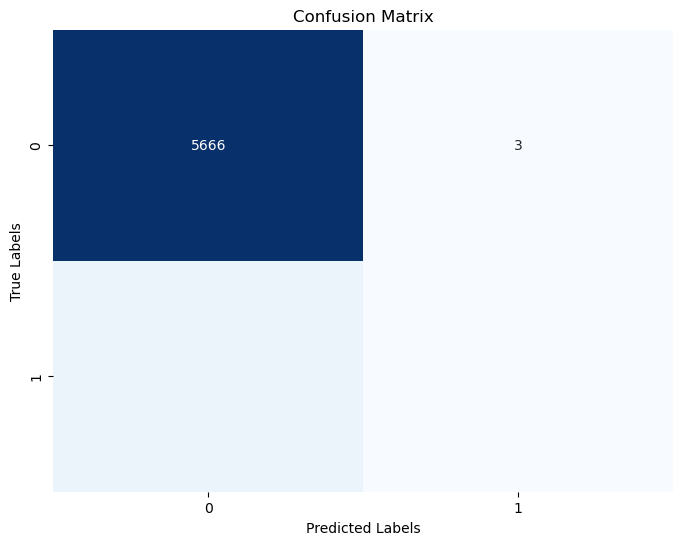

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5669
           1       0.40      0.01      0.01       331

    accuracy                           0.94      6000
   macro avg       0.67      0.50      0.49      6000
weighted avg       0.92      0.94      0.92      6000



In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained predictions in 'y_pred'
# Replace 'y_pred' with your model's predictions and 'y_val' with the true labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize the plot labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

# Print the classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Get class probability scores for each class
# probabilities = model.predict_proba(X_test)

# # Get ROC metrics for each class
# fpr = {}  # False Positive Rate
# tpr = {}  # True Positive Rate
# roc_auc = {}  # AUC

# classes = [0, 1]  # Define the two classes you're interested in (0 and 1)

# for i in classes:
#     fpr[i], tpr[i], _ = roc_curve(y_pred == i, probabilities[:, i])
#     roc_auc[i] = roc_auc_score(y_pred == i, probabilities[:, i])

# # Plot the ROC chart for each class
# plt.figure(figsize=(8, 6))
# colors = ['blue', 'orange']  # Colors for the two classes
# for i in classes:
#     plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# # Set the title and axis labels for the ROC chart
# plt.title('ROC curve for Binary Classification')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# # Add a legend to distinguish different class ROC curves
# plt.legend(loc='best')

# # Display the ROC chart
# plt.show()


In [93]:
df = pd.DataFrame(data)

In [94]:
df.dtypes

ORDER_ID                       int64
CLASS                          int64
B_EMAIL                        int64
B_TELEFON                      int64
FLAG_LRIDENTISCH               int64
                              ...   
FAIL_RORT_encoded              int64
FAIL_RPLZORTMATCH_encoded      int64
NEUKUNDE_encoded               int64
FLAG_LRIDENTISCH_encoded       int64
AGE                          float64
Length: 76, dtype: object

In [95]:
# Import necessary libraries from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Define the feature columns to be scaled (include all column indices)
feature_columns = list(range(75))  # Assuming you have 76 columns in your dataset

# Create a feature transformer pipeline for scaling the numeric features
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)
    ], remainder='passthrough')  # 'remainder' includes non-numeric columns

# Create the training pipeline with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Use RandomForestClassifier
])

# Fit the pipeline to train a Random Forest model on your dataset
model = pipeline.fit(X_train, y_train)  # Replace X_train and y_train with your data



In [96]:
# Step 4: Making Predictions on Test Data
# Load the test data
test_data = pd.read_csv("risk-test.txt",sep='\t') 

In [97]:
test_data.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,?,?,?
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,...,yes,no,no,5,yes,0,0.00,?,?,?
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,...,yes,no,no,8,yes,0,0.00,?,?,?


In [98]:
# Ensure that the number of columns in the test data matches that of the training data
#if X_train.shape[1] != test_data.shape[1]:
# Handle the mismatch by either adding or removing columns

# Now you can standardize your test data
#test_data = scaler.transform(test_data)


In [99]:
import joblib
import pandas as pd  # Assuming you're using pandas for dataset handling


# Replace 'your_model.pkl' with the path where you want to save the model
model_filename = 'risk.pkl'

# Assuming 'model' is the variable containing your pre-trained model
joblib.dump(model, model_filename)


['risk.pkl']

In [100]:
# Step 4: Making Predictions on Test Data
# Load the test data
data1 = pd.read_csv("risk-test.txt",sep='\t') 
data1.sample(10)

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
1501,42467,no,no,5/23/1983,yes,no,check,?,12.2006,?,...,no,no,no,15,yes,0,0.00,?,?,?
7989,26084,yes,no,?,yes,no,credit_card,Visa,9.2005,yes,...,no,no,no,12,yes,0,0.00,?,?,?
2517,39816,yes,no,12/21/1980,yes,no,check,?,10.2005,?,...,no,no,no,7,no,1,7.36,6/3/2001,0,0
16097,5563,no,no,1/16/1969,yes,no,credit_card,Eurocard,6.2005,yes,...,no,no,no,14,no,1,10.46,9/15/2001,0,0
12582,14629,yes,yes,1/20/1975,yes,no,credit_card,Visa,9.2005,yes,...,no,no,no,1,yes,0,0.00,?,?,?
11214,18028,yes,no,4/18/1966,no,no,credit_card,Amex,7.2005,yes,...,no,no,no,15,no,1,9.69,1/12/2003,1,1
19502,48057,yes,no,8/1/1967,yes,no,check,?,7.2005,?,...,no,no,no,6,no,1,31.87,4/22/2004,0,0
13305,12689,no,no,9/6/1965,yes,no,debit_note,?,9.2006,yes,...,no,no,no,17,no,1,11.24,12/15/2003,0,0
14707,9336,yes,no,7/27/1977,yes,no,credit_card,Visa,4.2007,yes,...,no,no,no,13,no,1,32.96,10/8/2001,0,0
17504,2259,yes,yes,9/4/1972,no,no,credit_card,Visa,1.2005,yes,...,no,no,no,18,yes,0,0.00,?,?,?


In [101]:
data1.fillna(method="ffill", inplace=True)
data1 = pd.get_dummies(data1, columns=["Z_METHODE", "Z_CARD_ART", "Z_LAST_NAME", "WEEKDAY_ORDER"])
print(data1.head())

# List the column names
print(data1.columns)

data1['TIME_ORDER'] = data1['TIME_ORDER'].replace('?', np.nan)
data1['TIME_ORDER'] = pd.to_datetime(data1['TIME_ORDER'], errors='coerce')
data1['TIME_ORDER'] = data1['TIME_ORDER'].dt.hour * 60 + data1['TIME_ORDER'].dt.minute

mean_time = data1['TIME_ORDER'].mean()
data1['TIME_ORDER'].fillna(mean_time, inplace=True)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

columns_to_encode = ['B_EMAIL', 'B_TELEFON', 'FLAG_NEWSLETTER', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO',
    'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH',
    'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE','FLAG_LRIDENTISCH']

for column in columns_to_encode:
    data1[column + '_encoded'] = label_encoder.fit_transform(data1[column])

print(data1)

columns_to_encode = ['B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER']

for column in columns_to_encode:
    data1[column] = label_encoder.fit_transform(data1[column])
print(data1)

columns_to_encode = ['CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP',
       'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT',
       'FAIL_RPLZORTMATCH', 'NEUKUNDE']

for column in columns_to_encode:
    data1[column] = label_encoder.fit_transform(data1[column])
print(data1)

from datetime import datetime
import pandas as pd

def calculate_age(birthdate):
    try:
        birth_date = datetime.strptime(birthdate, '%m/%d/%Y')
        current_date = datetime.now()
        age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
        return age
    except:
        return None

data1['AGE'] = data1['B_BIRTHDATE'].apply(calculate_age)
data1.drop(columns=['B_BIRTHDATE'], inplace=True)
data1['AGE']

columns_with_question_marks = data1.columns[data1.isin(['?']).any()]
print(columns_with_question_marks)

import numpy as np

# List of columns to replace "?" with 0
columns_to_replace_question_mark = [
    'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05',
    'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09',
    'ANUMMER_10', 'DATE_LORDER', 'MAHN_AKT', 'MAHN_HOECHST'
]

# Replace "?" with 0 in the specified columns
data1[columns_to_replace_question_mark] = data1[columns_to_replace_question_mark].replace('?', 0)

# Now, the specified columns should have "?" replaced with 0
# Check which columns contain "?"
columns_with_question_marks = data1.columns[data1.isin(['?']).any()]
print(columns_with_question_marks)
# Check which columns contain "?"
columns_with_question_marks = data1.columns[data1.isin(['no']).any()]
print(columns_with_question_marks)
# Check which columns contain "?"
columns_with_question_marks = data1.columns[data1.isin(['12/27/2002']).any()]
print(columns_with_question_marks)

data1['DATE_LORDER'] = pd.to_datetime(data1['DATE_LORDER']).values.astype(np.int64) // 10 ** 9


   ORDER_ID B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH FLAG_NEWSLETTER  \
0     49916     yes        no   7/22/1979               no              no   
1     49918      no        no    2/5/1973               no              no   
2     49920     yes        no   7/19/1970              yes              no   
3     49921     yes        no    4/9/1985              yes              no   
4     49922      no       yes    4/7/1963               no              no   

   Z_CARD_VALID  VALUE_ORDER TIME_ORDER  AMOUNT_ORDER  ...  Z_LAST_NAME_?  \
0        2.2005         64.5       6:42             1  ...              0   
1        4.2005         74.3      14:44             4  ...              0   
2        8.2005         42.8      18:40             1  ...              1   
3        7.2006         42.8      14:22             1  ...              0   
4        5.2007          6.5       1:54             1  ...              0   

  Z_LAST_NAME_no Z_LAST_NAME_yes WEEKDAY_ORDER_Friday WEEKDAY_ORDER_

       ORDER_ID  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
0         49916        1          0   7/22/1979                 0   
1         49918        0          0    2/5/1973                 0   
2         49920        1          0   7/19/1970                 1   
3         49921        1          0    4/9/1985                 1   
4         49922        0          1    4/7/1963                 0   
...         ...      ...        ...         ...               ...   
19995     49820        1          0   4/14/1965                 1   
19996     49822        1          0    8/8/1975                 0   
19997     49823        1          0   5/11/1949                 0   
19998     49826        1          0   4/14/1976                 0   
19999     49827        1          0  10/21/1976                 0   

       FLAG_NEWSLETTER  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  AMOUNT_ORDER  \
0                    0        2.2005         64.5       402.0             1   
1            

In [102]:
X_test = scaler.transform(data1)  # Replace X_test with your test or new data


In [103]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)


In [104]:
test_predictions = model.predict(X_test)  # Replacing with  actual model and test data


In [105]:
# #Step 5: Save the predictions to a file
output_file = "classification_results_FINAL.txt"
 with open(output_file, "w") as f:
     for order_id, prediction in zip(test_data["ORDER_ID"], test_predictions):
          f.write(f"{order_id} {prediction}\n")